In [1]:
!pip install google-cloud-storage

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
from google.cloud import storage
import pandas as pd
import numpy as np

#### gs://marketplace-2xim6sjc/MedMNIST/120/artifactFiles/chestmnist_64.npz

# Initialize a client
client = storage.Client()

# Define the bucket and blob (file) names
bucket_name = 'marketplace-2xim6sjc'
blob_name = 'MedMNIST/120/artifactFiles/chestmnist_64.npz'

# Get the bucket and blob
bucket = client.bucket(bucket_name)
blob = bucket.blob(blob_name)

# Download the blob to a local file
local_file_path = 'chestmnist_64_local.npz'
blob.download_to_filename(local_file_path)

# Load the .npz file
data = np.load(local_file_path, allow_pickle=True)

# Access the data
for key in data:
    print(f"{key}: {data[key]}")


train_images: [[[133  24   2 ...  38  32   8]
  [113  16   1 ...  44  26   7]
  [111  15   1 ...  26  43  34]
  ...
  [121  15   0 ... 192 153  92]
  [127  16   0 ... 199 161 121]
  [136  23   2 ... 217 187 163]]

 [[  3   3   3 ...   1   1  12]
  [  3   3   3 ...   1   1  12]
  [  3   3   3 ...   1   0  11]
  ...
  [  2   2   2 ...   1   1   5]
  [  2   2   2 ...   1   1   7]
  [  5   5   5 ...   3   4  15]]

 [[246 237 230 ... 231 234 236]
  [166 107  88 ... 165 169 177]
  [ 46   4   1 ...  18  18  22]
  ...
  [ 34  28  28 ...  28  28  29]
  [ 34  28  28 ...  28  28  29]
  [ 34  28  28 ...  28  28  29]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[ 12   0   0 ...  27  28  30]
  [ 10   0   0 ...   1   1   1]
  [ 12   6  11 ...   8   2   0]
  ...
  [ 52  77 101 ...   0   0   0]
  [ 50  73  98 ...   0   0   0]
  [ 49  73  97

In [4]:
!pip install google-cloud-storage numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [6]:
# Download the blob to a local file
local_file_path = 'chestmnist_64_local.npz'
blob.download_to_filename(local_file_path)

# Load the .npz file
data = np.load(local_file_path, allow_pickle=True)

# Assuming the labels are stored under the key 'labels'
labels = data['train_labels']

# Print the shape of the labels to understand its structure
print(f"Labels shape: {labels.shape}")

Labels shape: (78468, 14)


In [7]:
# Count the number of samples in each class
unique, counts = np.unique(labels, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Print the class distribution
print("Train Class Distribution:")
for cls, count in class_distribution.items():
    print(f"Class {cls}: {count} samples")

Class Distribution:
Class 0: 1042052 samples
Class 1: 56500 samples


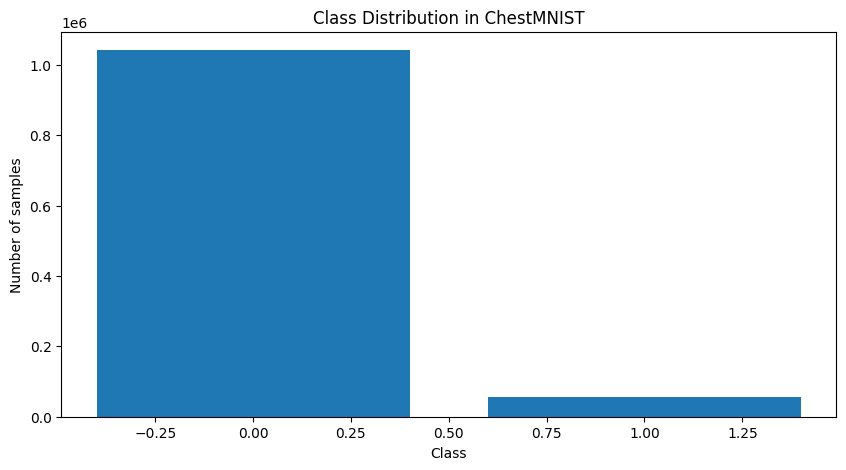

In [9]:
# Visualize the class distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Class Distribution in Train Data of ChestMNIST')
plt.show()

Labels shape: (11219, 14)
Val Class Distribution:
Class 0: 149088 samples
Class 1: 7978 samples


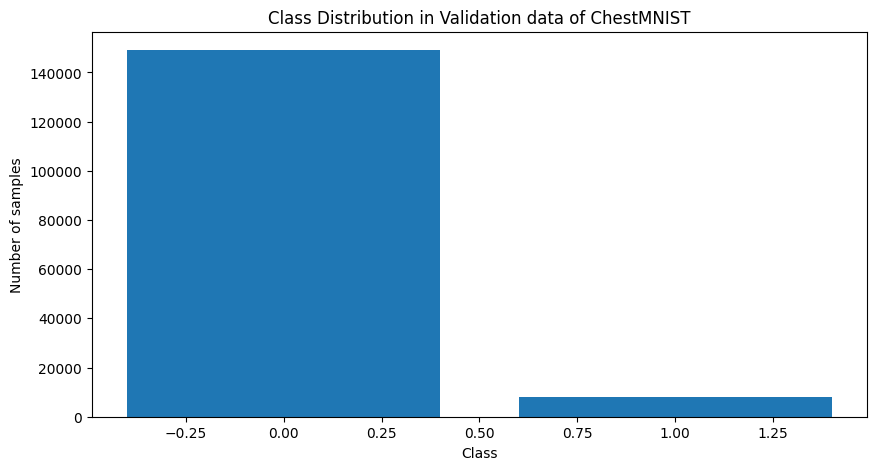

In [10]:
# Assuming the labels are stored under the key 'labels'
val_labels = data['val_labels']

# Print the shape of the labels to understand its structure
print(f"Labels shape: {val_labels.shape}")

# Count the number of samples in each class
unique, counts = np.unique(val_labels, return_counts=True)
val_class_distribution = dict(zip(unique, counts))

# Print the class distribution
print("Val Class Distribution:")
for cls, count in val_class_distribution.items():
    print(f"Class {cls}: {count} samples")
    
# Visualize the class distribution
plt.figure(figsize=(10, 5))
plt.bar(val_class_distribution.keys(), val_class_distribution.values())
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Class Distribution in Validation data of ChestMNIST')
plt.show()

Labels shape: (22433, 14)
Test Class Distribution:
Class 0: 297552 samples
Class 1: 16510 samples


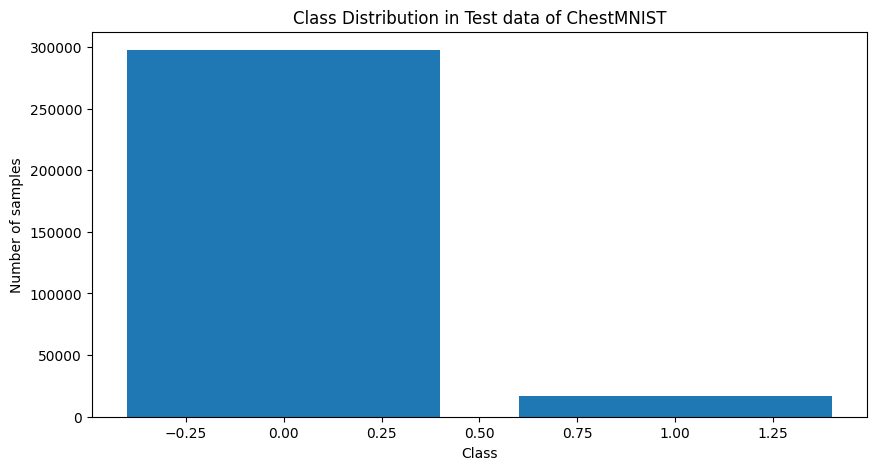

In [11]:
# Assuming the labels are stored under the key 'labels'
test_labels = data['test_labels']

# Print the shape of the labels to understand its structure
print(f"Labels shape: {test_labels.shape}")

# Count the number of samples in each class
unique, counts = np.unique(test_labels, return_counts=True)
test_class_distribution = dict(zip(unique, counts))

# Print the class distribution
print("Test Class Distribution:")
for cls, count in test_class_distribution.items():
    print(f"Class {cls}: {count} samples")
    
# Visualize the class distribution
plt.figure(figsize=(10, 5))
plt.bar(test_class_distribution.keys(), test_class_distribution.values())
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Class Distribution in Test data of ChestMNIST')
plt.show()